# Pymaceuticals Clinical Data Analysis
## 1. Import and Setup

In [29]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [81]:
# Set the shared font configurations for title and axis labels
title_font = {'fontname':'Arial', 'size':'20', 'color':'black', 'weight':'semibold' }              
axis_font = {'fontname':'Arial', 'size':'16'}
legend_font = {'size' : '14' }
ticks_fontsize = 14
marker_size = 14
fig_size = (16, 10)

## 2. Load and Clean Data

In [14]:
# Load two dataframes (clinical trials and mice data)
mice_data_path = "../Input/mouse_drug_data.csv"
cancer_data_path = "../Input/clinicaltrial_data.csv"

mice_data = pd.read_csv(mice_data_path)
cancer_data = pd.read_csv(cancer_data_path)
# ... merge it together
data = mice_data.merge(cancer_data, on='Mouse ID')
# ... and keep only data on four specific drugs
drugs_to_keep = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
data = data.loc[data['Drug'].isin(drugs_to_keep)].reset_index(drop=True)
data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,q119,Ketapril,0,45.000000,0
1,q119,Ketapril,5,47.864440,0
2,q119,Ketapril,10,51.236606,0
3,n923,Ketapril,0,45.000000,0
4,n923,Ketapril,5,45.824881,0


In [15]:
# First lets check if we have empty values anywhere (we drop lines with no data at all)
data = data.dropna(how='all')
has_empty_values = pd.isnull(data).any().any()
print('There are empty values in dataframe' if has_empty_values else 'No empty values in dataframe')

No empty values in dataframe


## 2.  Tumor Response to Treatment

In [121]:
# Calculate mean tumor volume and standard error of mean for each drug and timepoint
data_by_drug_timepoint = data.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)']
mean_tumor_volume = data_by_drug_timepoint.mean()
sem_tumor_volume = data_by_drug_timepoint.sem()
#mean_tumor_volume.to_csv('mean.csv')
#sem_tumor_volume.to_csv('sem.csv')
# Now lets convert these series into the dataframe where every drug data is in its separate column
mean_tumor_volume = mean_tumor_volume.unstack(level=0)
sem_tumor_volume = sem_tumor_volume.unstack(level=0)
# Lets merge those two frames just to see the whole picture
column_names = [(drug + ' (Mean)', drug + ' (SEM)') for drug in drugs_to_keep]
ordered_column_names = [column_name for column_name_pair in column_names for column_name in column_name_pair]
mean_and_sem_tumor_volume = pd.concat([
    mean_tumor_volume.rename(columns={column:column + ' (Mean)' for column in mean_tumor_volume.columns}), 
    sem_tumor_volume.rename(columns={column:column + ' (SEM)' for column in sem_tumor_volume.columns})
], axis=1).loc[:, ordered_column_names]
mean_and_sem_tumor_volume.head()


Drug,Capomulin (Mean),Capomulin (SEM),Infubinol (Mean),Infubinol (SEM),Ketapril (Mean),Ketapril (SEM),Placebo (Mean),Placebo (SEM)
Timepoint,,,,,,,,
0,45.000000,0.000000,45.000000,0.000000,45.000000,0.000000,45.000000,0.000000
5,44.266086,0.448593,47.062001,0.235102,47.389175,0.264819,47.125589,0.218091
10,43.084291,0.702684,49.403909,0.282346,49.582269,0.357421,49.423329,0.402064
15,42.064317,0.838617,51.296397,0.357705,52.399974,0.580268,51.359742,0.614461
20,40.716325,0.909731,53.197691,0.476210,54.920935,0.726484,54.364417,0.839609


<Figure size 432x288 with 0 Axes>

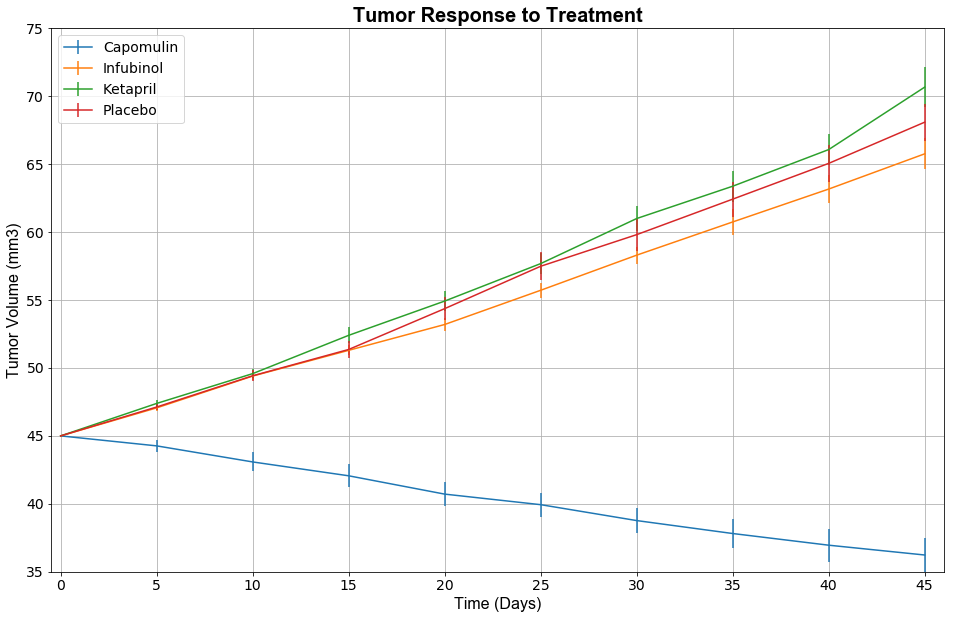

In [120]:
# Plotting all drug data on the same plot
plt.figure()
mean_tumor_volume.plot(figsize=fig_size, 
                       style=['^-', 'o--', 'x-.', 'D-'], 
                       legend=False,
                       yerr=sem_tumor_volume,
                       markersize=marker_size)
plt.xlabel('Time (Days)', **axis_font)
plt.xlim(-0.5, mean_tumor_volume.index.values[-1] + 1)
plt.ylim(35, 75)
plt.xticks(mean_tumor_volume.index.values, fontsize=ticks_fontsize)
plt.ylabel('Tumor Volume (mm3)', **axis_font)
plt.yticks(fontsize=ticks_fontsize)
plt.title('Tumor Response to Treatment', **title_font)
plt.legend(loc='upper left', prop=legend_font)
plt.grid()

In [ ]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure



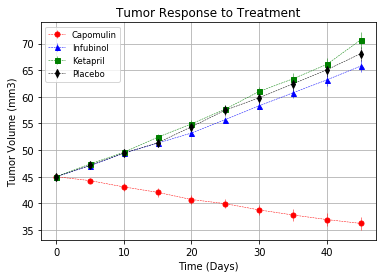

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [ ]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


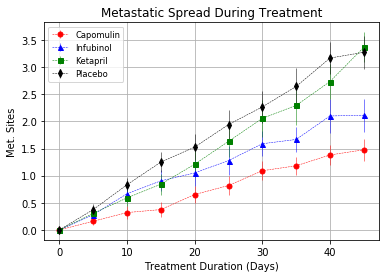

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

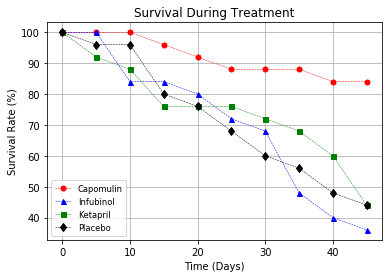

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

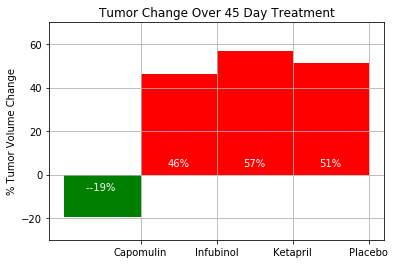